# Spotify Good Music Classifier

People like to recommend me new music when I have no time to just sit and relax and actually focus on the music that they send me.

__"Can I build some kind of application that is tuned to my specific music tastes, which will then predict if I like the song or not?"__

Introducing... the GOOD MUSIC CLASSIFIER!!

[Link to the data!](https://developer.spotify.com/documentation/web-api/reference/tracks/get-several-audio-features/)

Spotify has an API (application interface) where we can query data that they keep about EVERY. SINGLE. TRACK on spotify. These attributes include ```acousticness```, ```danceability```, ```energy```, ```instrumentalness```, and so forth. This does __NOT__, unfortunately, include things like... genre or year released, or some other attributes that might have been really good indicators that you might intuitively think of.

In [1]:
dat = read.csv('complete_data.csv')
attach(dat)

In [2]:
names(dat)

[1] "acousticness"     "analysis_url"     "danceability"     "duration_ms"     
 [5] "energy"           "id"               "instrumentalness" "key"             
 [9] "liveness"         "loudness"         "mode"             "speechiness"     
[13] "tempo"            "time_signature"   "track_href"       "type"            
[17] "uri"              "valence"          "class"

For example, for one of the predictors, it seems intuitive that how loud a song is might correlate with how much energy is associated with it. We can see that linear relationship here!

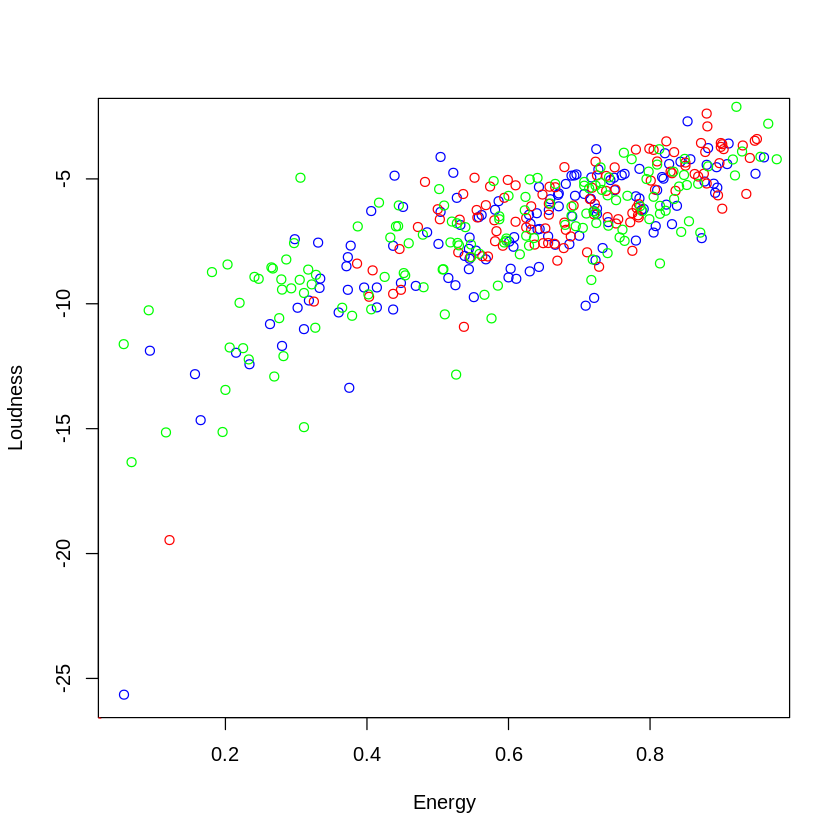

In [3]:
plot(energy[1:131], loudness[1:131], col='blue', xlab="Energy", ylab="Loudness") #good songs
points(energy[132:241], loudness[132:241], col='red') #bad songs
points(energy[242:383], loudness[242:383], col='green') #bad songs

*side fun fact: I was wondering what that sad little blue dot was in the corner so I decided to find out what song that was*

In [4]:
which.min(loudness)
dat[235,]

[1] 235

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,class
235,0.994,https://api.spotify.com/v1/audio-analysis/7gpL5CorPuYBthvZkPPFGd,0.161,138798,0.00613,7gpL5CorPuYBthvZkPPFGd,0.846,0,0.0895,-38.027,1,0.039,74.671,1,https://api.spotify.com/v1/tracks/7gpL5CorPuYBthvZkPPFGd,audio_features,spotify:track:7gpL5CorPuYBthvZkPPFGd,0.0363,bad


This is what the data looks like!

In [5]:
dat[1:3,]

acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,class
0.214,https://api.spotify.com/v1/audio-analysis/6rZwsNzGS7nq8qILqdM9kX,0.572,252267,0.532,6rZwsNzGS7nq8qILqdM9kX,0.00e+00,0,0.2840,-6.844,1,0.0316,76.033,4,https://api.spotify.com/v1/tracks/6rZwsNzGS7nq8qILqdM9kX,audio_features,spotify:track:6rZwsNzGS7nq8qILqdM9kX,0.607,good
0.194,https://api.spotify.com/v1/audio-analysis/5P3yUXUC9rZPJPNmYGKEAz,0.565,236733,0.437,5P3yUXUC9rZPJPNmYGKEAz,7.14e-06,6,0.0656,-7.680,0,0.0403,96.132,3,https://api.spotify.com/v1/tracks/5P3yUXUC9rZPJPNmYGKEAz,audio_features,spotify:track:5P3yUXUC9rZPJPNmYGKEAz,0.217,good
0.099,https://api.spotify.com/v1/audio-analysis/3ZGrUoFhNCWmm6sbFAuktX,0.587,241320,0.525,3ZGrUoFhNCWmm6sbFAuktX,2.50e-04,9,0.5570,-9.257,0,0.1980,90.356,4,https://api.spotify.com/v1/tracks/3ZGrUoFhNCWmm6sbFAuktX,audio_features,spotify:track:3ZGrUoFhNCWmm6sbFAuktX,0.323,good


In [6]:
summary(class)

bad good okay 
 110  131  142

I usually sort my playlists by date. I get tired of music that I put on repeat and after a couple of months, it's time to move on and look for new music. I decided to use this to define what I determined to be a good, okay, or bad song.

```good``` songs are ones that have made it from one playlist to a second one. Or just my all-time favorites.

```okay``` songs are ones that were in a playlist, but I've over-played it to the point where it's meh now or just wasn't great enough to make it to the next evolution.

```bad``` songs that I found when searching "Top Country Hits" (and EDM and KPOP)

The idea was to find things about my data that might be able to separate them into classes of good, okay, or bad. So if I take the energy example from earlier I can see that the mean of each class is as follows:

In [7]:
mean(energy[1:131])
mean(energy[132:241])
mean(energy[241:382])

[1] 0.6150992

[1] 0.6841094

[1] 0.5734317

## Let's create some models!

I'm going to try all the classification methods that we learned to see how each one of them compares in this data set.

In [8]:
#Split into test/train
set.seed(1)
indices = sample(382)
trainIndices = indices[1:292]

train = dat[trainIndices,]
test = dat[-trainIndices,]

dim(train)
summary(train$class)

[1] 292  19

bad good okay 
  86  101  105

### Logisitic Regression

In [9]:
names(dat)

[1] "acousticness"     "analysis_url"     "danceability"     "duration_ms"     
 [5] "energy"           "id"               "instrumentalness" "key"             
 [9] "liveness"         "loudness"         "mode"             "speechiness"     
[13] "tempo"            "time_signature"   "track_href"       "type"            
[17] "uri"              "valence"          "class"

In [10]:
logModel = glm(
    class~acousticness+danceability+energy+duration_ms
    +instrumentalness+key+liveness+loudness+mode+speechiness
    +tempo+time_signature+valence, data=train, family=binomial)

In [11]:
summary(logModel)


Call:
glm(formula = class ~ acousticness + danceability + energy + 
    duration_ms + instrumentalness + key + liveness + loudness + 
    mode + speechiness + tempo + time_signature + valence, family = binomial, 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3077  -0.8488   0.4171   0.7620   1.5510  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)       4.293e+00  2.943e+00   1.459 0.144618    
acousticness      1.855e+00  8.644e-01   2.145 0.031914 *  
danceability     -6.490e+00  1.437e+00  -4.517 6.26e-06 ***
energy           -1.881e+00  1.461e+00  -1.287 0.198003    
duration_ms       1.534e-05  4.453e-06   3.444 0.000573 ***
instrumentalness -6.028e-04  1.160e+00  -0.001 0.999585    
key              -1.062e-01  4.217e-02  -2.518 0.011808 *  
liveness          2.702e-01  1.276e+00   0.212 0.832264    
loudness          1.358e-01  8.394e-02   1.618 0.105608    
mode             -6.846e-01  3.334e-01 

In [12]:
logModelProbs = predict(logModel, test, type='response')
logModelPredictions=rep('good', dim(test)[1])
logModelPredictions[logModelProbs<.75]='okay'
logModelPredictions[logModelProbs<.25]='bad'
test$prediction = logModelPredictions
legible = data.frame(test$uri, test$class, test$prediction)

In [13]:
legible[(legible$test.class == 'bad'),]

,test.uri,test.class,test.prediction
31,spotify:track:65hRZOQkVjmBdusz1N7aOv,bad,good
32,spotify:track:5kVAp9lANGadGK1s7mxv0h,bad,okay
33,spotify:track:1Be8liECvEP5NYZjYvukbI,bad,okay
34,spotify:track:7M1PQZeyqslVtY5ZiYBGLo,bad,okay
35,spotify:track:7rdK9NSJIRBZAiXC0vuBS9,bad,okay
36,spotify:track:09ts3GnICqYEU5PkQCpJK3,bad,okay
37,spotify:track:5gfK6bZFaApxdSHsHXrwPD,bad,okay
38,spotify:track:6CyJlVAEFlNdpggOLanytL,bad,okay
39,spotify:track:3LhzpgimYSZhTx5KuchwVX,bad,okay
40,spotify:track:30MM5jWpUmOxtTNd9Ey5LZ,bad,bad


In [14]:
names(legible)

[1] "test.uri"        "test.class"      "test.prediction"

In [15]:
table(logModelPredictions, test$class)
mean(logModelPredictions==test$class)

                   
logModelPredictions bad good okay
               bad    4    1    0
               good   4   19   23
               okay  16   10   14

[1] 0.4065934

Running this normally gave us about a 40% accuracy rate on our testing dataset. Let's run leave one out cross validatation to learn about the MSE of our entire data.

In [31]:
install.packages('boot')
library(boot)
??cv

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [35]:
logModel = glm(
    class~acousticness+danceability+energy+duration_ms
    +instrumentalness+key+liveness+loudness+mode+speechiness
    +tempo+time_signature+valence, data=dat, family=binomial)

In [36]:
crossValidationError = cv.glm(dat, logModel)

In [38]:
crossValidationError$delta[1]

[1] 0.1737733

This has a really low MSE! This means that a this logistic model was able to describe the pattern of the music, despite the low accuracy rate. But because to be honest, I don't think that running a regular accuracy test like this would be as effective. But this is a 3 class problem, so logistic regression wasn't supposed to be very good in this situation.

### Linear Discriminant Analysis

In [39]:
# install.packages('MASS')
library('MASS')

In [40]:
ldaModel = lda(
    class~acousticness+danceability+energy+duration_ms
    +instrumentalness+key+liveness+loudness+mode+speechiness
    +tempo+time_signature+valence, data=train)
ldaModel

Call:
lda(class ~ acousticness + danceability + energy + duration_ms + 
    instrumentalness + key + liveness + loudness + mode + speechiness + 
    tempo + time_signature + valence, data = train)

Prior probabilities of groups:
      bad      good      okay 
0.2945205 0.3458904 0.3595890 

Group means:
     acousticness danceability    energy duration_ms instrumentalness      key
bad     0.1506504    0.6497907 0.6874317    203483.8       0.03023420 5.616279
good    0.2623870    0.5634653 0.6326832    224786.1       0.03560117 4.772277
okay    0.3438728    0.5369143 0.5618695    228823.2       0.02660713 4.961905
      liveness  loudness      mode speechiness    tempo time_signature
bad  0.1666291 -6.508209 0.7209302  0.09032093 122.4198       3.941860
good 0.1620119 -7.170069 0.6534653  0.09166139 121.4994       3.881188
okay 0.1732562 -7.587800 0.6666667  0.06165143 121.5010       3.952381
       valence
bad  0.5274919
good 0.4379158
okay 0.4074419

Coefficients of linear discriminan

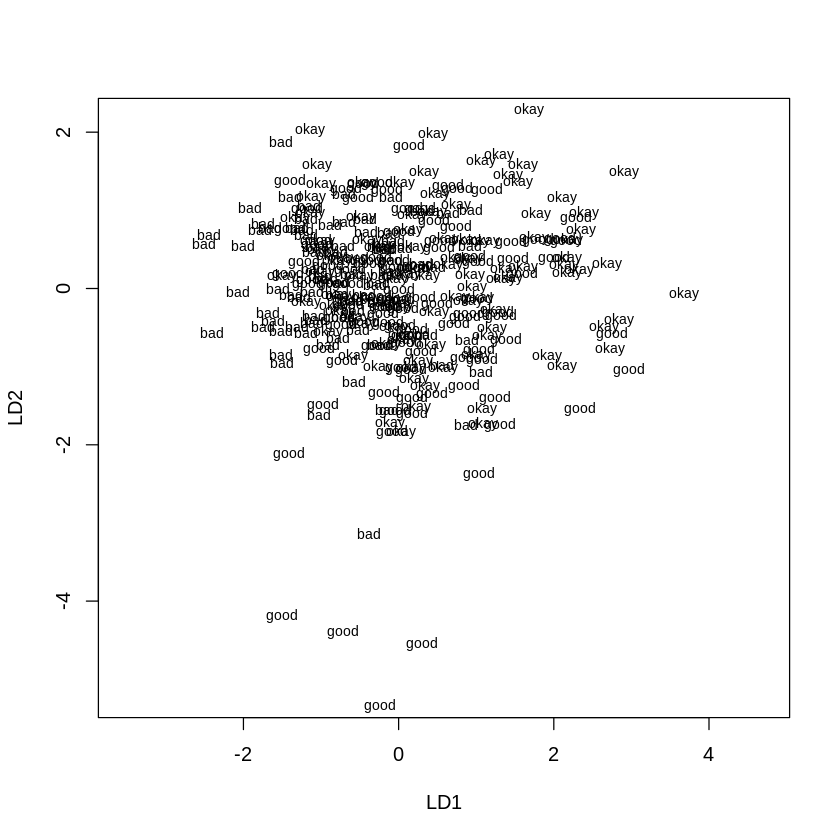

In [41]:
plot(ldaModel)

In [42]:
ldaPredictions = predict(ldaModel, test)
table(ldaPredictions$class, test$class)
mean(ldaPredictions$class==test$class)

      
       bad good okay
  bad   16    7   11
  good   4    5   11
  okay   4   18   15

[1] 0.3956044

In [49]:
??cv

In [55]:
ldaModel = lda(
    class~acousticness+danceability+energy+duration_ms
    +instrumentalness+key+liveness+loudness+mode+speechiness
    +tempo+time_signature+valence, data=train, CV=TRUE)

I did CV here on the ldaModel, but wasn't exactly sure how to interpret the results. Linear Disciminant Analysis did about the same as logistic regression here, in terms of accuracy.

### Quadratic Discriminant Analysis

In [59]:
qdaModel=qda(class~acousticness+danceability+energy+duration_ms
    +instrumentalness+key+liveness+loudness+mode+speechiness
    +tempo+time_signature+valence, data=train)
qdaModel

Call:
qda(class ~ acousticness + danceability + energy + duration_ms + 
    instrumentalness + key + liveness + loudness + mode + speechiness + 
    tempo + time_signature + valence, data = train)

Prior probabilities of groups:
      bad      good      okay 
0.2945205 0.3458904 0.3595890 

Group means:
     acousticness danceability    energy duration_ms instrumentalness      key
bad     0.1506504    0.6497907 0.6874317    203483.8       0.03023420 5.616279
good    0.2623870    0.5634653 0.6326832    224786.1       0.03560117 4.772277
okay    0.3438728    0.5369143 0.5618695    228823.2       0.02660713 4.961905
      liveness  loudness      mode speechiness    tempo time_signature
bad  0.1666291 -6.508209 0.7209302  0.09032093 122.4198       3.941860
good 0.1620119 -7.170069 0.6534653  0.09166139 121.4994       3.881188
okay 0.1732562 -7.587800 0.6666667  0.06165143 121.5010       3.952381
       valence
bad  0.5274919
good 0.4379158
okay 0.4074419

In [22]:
qdaPredict=predict(qdaModel, test)
table(qdaPredict$class, test$class)
mean(qdaPredict$class==test$class)

      
       bad good okay
  bad   14    6   11
  good   2    5    6
  okay   8   19   20

[1] 0.4285714

In [60]:
qdaModel=qda(class~acousticness+danceability+energy+duration_ms
    +instrumentalness+key+liveness+loudness+mode+speechiness
    +tempo+time_signature+valence, data=dat)

Same deal as the above for linear discriminant analysis.

### K nearest Neighbors

In [61]:
# install.packages('class')
library(class)

In [62]:
KNNTrain = cbind(train$acousticness, train$danceability, 
                 train$energy, train$duration_ms, train$instrumentalness,
                 train$key, train$liveness, train$loudness, train$mode,
                 train$speechiness, train$tempo, train$time_signature,
                 train$valence)
KNNTest = cbind(test$acousticness, test$danceability, 
                 test$energy, test$duration_ms, test$instrumentalness,
                 test$key, test$liveness, test$loudness, test$mode,
                 test$speechiness, test$tempo, test$time_signature,
                 test$valence)

In [63]:
set.seed(1)
KNNModel=knn(KNNTrain, KNNTest, train[['class']], k=25)
table(KNNModel, test$class)
mean(KNNModel==test$class)

# for (i in 1:90){
#     KNNModel=knn(KNNTrain, KNNTest, train[['class']], k=i)
#     table(KNNModel, test$class)
#     print(paste(i,":", mean(KNNModel==test$class)))
# }


        
KNNModel bad good okay
    bad   13    8   10
    good   4   13   12
    okay   7    9   15

[1] 0.4505495

25 seemed like the magic number after looping through 90 different values of K's, but they were all around the same.

### Random Forest

In [69]:
# install.packages('randomForest')
library(randomForest)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.


In [27]:
freq = vector()
for (j in c(1:100)) {
    maxClassification = vector()
    for (i in seq(25, 500, 25)) {
        RFModel = randomForest(class~acousticness+danceability+energy+duration_ms
            +instrumentalness+key+liveness+loudness+mode+speechiness
            +tempo+time_signature+valence, data=dat, subset=trainIndices, mtry=6, ntree=i)
        RFPreds = predict(RFModel, newdata=test)
        table(RFPreds, test$class)
        classAcc = mean(RFPreds==test$class)
        maxClassification=append(maxClassification, classAcc)
    }
    freq = append(freq, (which.max(maxClassification)*25))
}

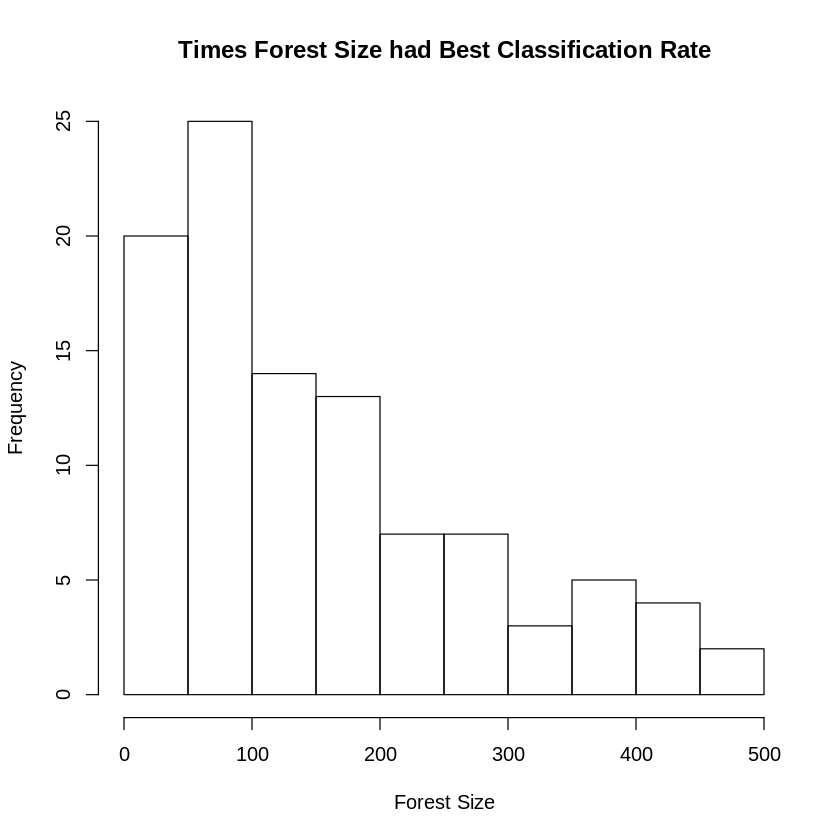

In [28]:
hist(freq, xlab="Forest Size", ylab="Frequency", main="Times Forest Size had Best Classification Rate")

I did the above to find the best value of forest size to use by iterating over several values of forest size and building several random forests on them. Sizes between 50 and 100 seems to be the best.

In [70]:
RFModel = randomForest(class~acousticness+danceability+energy+duration_ms
            +instrumentalness+key+liveness+loudness+mode+speechiness
            +tempo+time_signature+valence, data=dat, subset=trainIndices, mtry=13, ntree=75)

In [71]:
RFPreds = predict(RFModel, test)
table(RFPreds, test$class)
mean(RFPreds==test$class)

       
RFPreds bad good okay
   bad   13    7   11
   good   6   12   15
   okay   5   11   11

[1] 0.3956044

,MeanDecreaseGini
acousticness,19.180385
danceability,28.813502
energy,16.763668
duration_ms,19.995166
instrumentalness,17.567800
key,7.536846
liveness,17.540113
loudness,12.453979
mode,1.841089
speechiness,17.630762


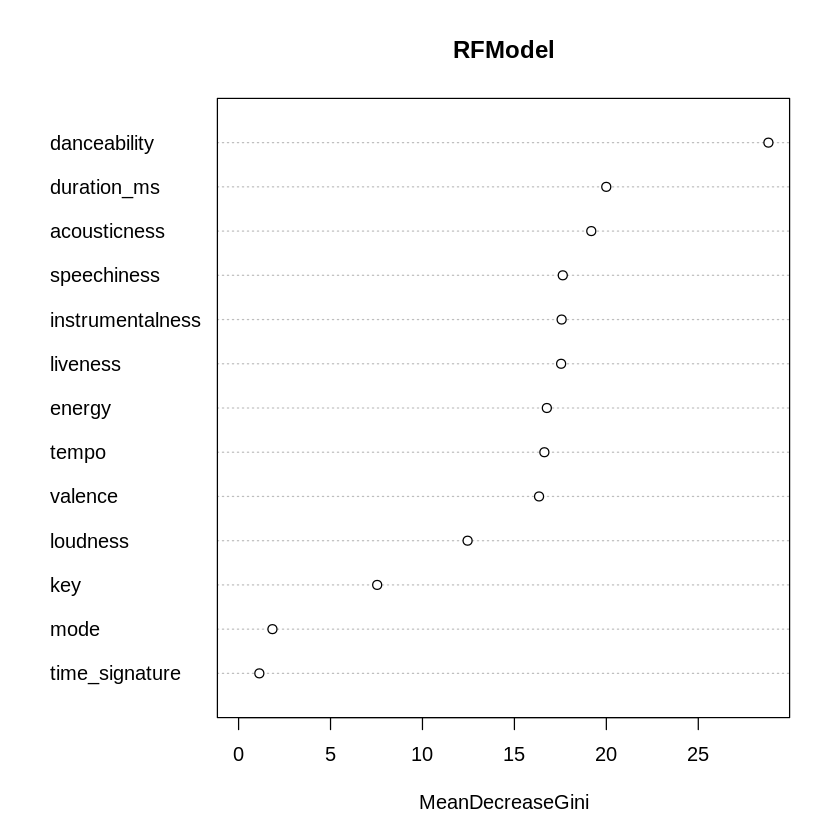

In [72]:
importance(RFModel)
varImpPlot(RFModel)

Through this importance plot, we can see that for specifically my own songs, ```danceability``` is by far the best predictor for music! ```Duration``` and ```acousticness``` of the song come up second, but are about the same as ```speechiness```-```valence```.

In short, it's pretty difficult to distinguish the three classes from each other because they are pretty similar and this is a three-class problem. I believe that my results would be better if I had only done the good-bad classification problem.

## Everything we just did but with only Good and Bad Indices!

In [73]:
set.seed(1)
new_dat=read.csv('complete_data_no_ok.csv')
summary(new_dat$class)

bad good 
 110  131

In [74]:
indices = sample(241)
trainIndices = indices[1:193]

train = new_dat[trainIndices,]
test = new_dat[-trainIndices,]

dim(train)
summary(train$class)

[1] 193  19

bad good 
  89  104

### Logistic Regression

In [75]:
logModel = glm(
    class~acousticness+danceability+energy+duration_ms
    +instrumentalness+key+liveness+loudness+mode+speechiness
    +tempo+time_signature+valence, data=train, family=binomial)

In [76]:
logModelProbs = predict(logModel, test, type='response')
logModelPredictions=rep('good', dim(test)[1])
logModelPredictions[logModelProbs<.5]='bad'
test$prediction = logModelPredictions
legible = data.frame(test$uri, test$class, test$prediction)

In [77]:
table(logModelPredictions, test$class)
mean(logModelPredictions==test$class)

                   
logModelPredictions bad good
               bad   15    8
               good   6   19

[1] 0.7083333

In [79]:
logModel = glm(
    class~acousticness+danceability+energy+duration_ms
    +instrumentalness+key+liveness+loudness+mode+speechiness
    +tempo+time_signature+valence, data=new_dat, family=binomial)

cvError = cv.glm(new_dat, logModel)

In [80]:
cvError$delta[1]

[1] 0.2103466

It looks like the MSE of the two-class model problem went up by just a tad, but the tradeoff for accuracy seems to be worth it.

### Linear Discriminant Analysis

In [81]:
library('MASS')
ldaModel = lda(
    class~acousticness+danceability+energy+duration_ms
    +instrumentalness+key+liveness+loudness+mode+speechiness
    +tempo+time_signature+valence, data=train)

ldaPredictions = predict(ldaModel, test)
table(ldaPredictions$class, test$class)
mean(ldaPredictions$class==test$class)

      
       bad good
  bad   15    8
  good   6   19

[1] 0.7083333

### Quadratic Discriminant Analysis

In [82]:
qdaModel=qda(class~acousticness+danceability+energy+duration_ms
    +instrumentalness+key+liveness+loudness+mode+speechiness
    +tempo+time_signature+valence, data=train)

qdaPredict=predict(qdaModel, test)
table(qdaPredict$class, test$class)
mean(qdaPredict$class==test$class)

      
       bad good
  bad   17   11
  good   4   16

[1] 0.6875

### K Nearest Neighbors

In [83]:
library(class)

KNNTrain = cbind(train$acousticness, train$danceability, 
                 train$energy, train$duration_ms, train$instrumentalness,
                 train$key, train$liveness, train$loudness, train$mode,
                 train$speechiness, train$tempo, train$time_signature,
                 train$valence)
KNNTest = cbind(test$acousticness, test$danceability, 
                 test$energy, test$duration_ms, test$instrumentalness,
                 test$key, test$liveness, test$loudness, test$mode,
                 test$speechiness, test$tempo, test$time_signature,
                 test$valence)

KNNModel=knn(KNNTrain, KNNTest, train[['class']], k=25)
table(KNNModel, test$class)
mean(KNNModel==test$class)

        
KNNModel bad good
    bad   16    8
    good   5   19

[1] 0.7291667

### Random Forest

In [84]:
library(randomForest)

In [87]:
RFModel = randomForest(class~acousticness+danceability+energy+duration_ms
            +instrumentalness+key+liveness+loudness+mode+speechiness
            +tempo+time_signature+valence, data=new_dat, subset=trainIndices, mtry=13, ntree=75)

RFPreds = predict(RFModel, test)
table(RFPreds, test$class)
mean(RFPreds==test$class)

       
RFPreds bad good
   bad   15    8
   good   6   19

[1] 0.7083333

,MeanDecreaseGini
acousticness,8.92858566
danceability,17.74060535
energy,6.18476127
duration_ms,9.73412715
instrumentalness,9.83180238
key,3.24946468
liveness,7.48121026
loudness,4.96194642
mode,0.66398284
speechiness,10.92835510


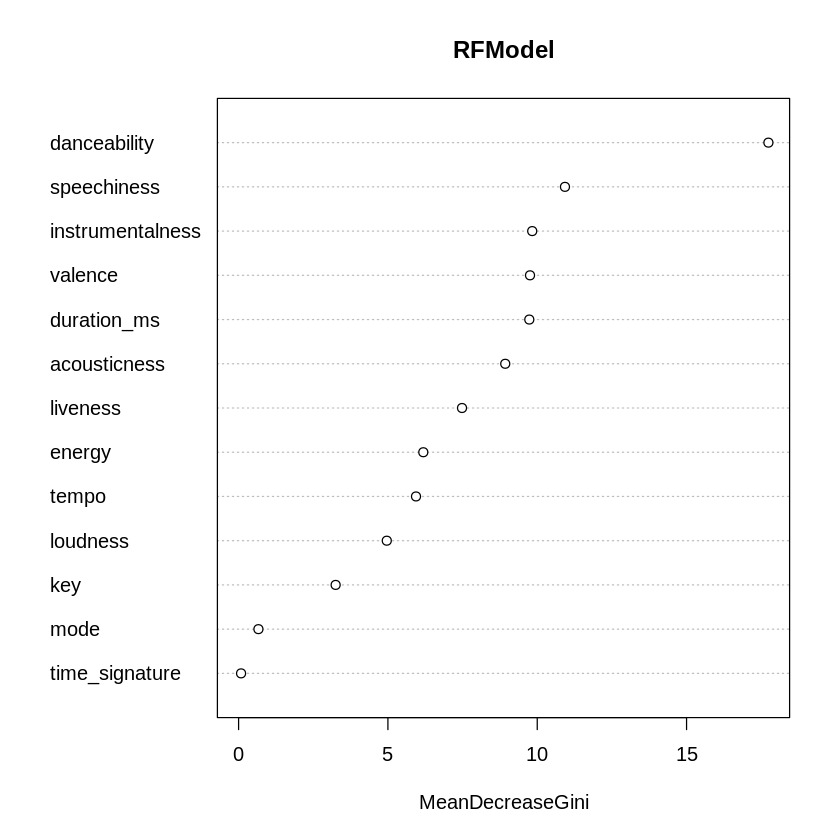

In [88]:
importance(RFModel)
varImpPlot(RFModel)

For the importance, they all seem to be about the same again, just shifted down the MeanDecreaseGini plot (this one ranges from 0-15 while the one above ranged from 0-30). The different factors are still about the same, but shifted around a bit. I think it's safe to assume that ```danceability``` is still the most important with the rest except for ```mode``` and ```time_signature``` to be decent, but not the best features to pay attention to.

But as hypothesized, my accuracy rates increased by a lot because we only considered the 2-class problem instead of a 3-class problem. There is more separability between just good-bad verses good-okay-bad.

But if I were to generalize this problem to beyond just myself: does the important factors to my music really matter? Just because danceability is the best factor tuned to my tastes, doesn't mean that it will be for my professor or my mom. And those are the most important people to cater to.

Maybe I just care about getting the best possible accuracy of my predictions...

## Neural Networks - BROKEN AS OF 12/7/18

In [178]:
dat=read.csv('complete_data_no_ok.csv')
dim(dat)

[1] 241  19

In [179]:
N = dim(dat)[1] #number of points
classes = 2 #good and bad
dimensionality = 2 #2 layer NN

In [180]:
dat = dat[,-2]
dat = dat[,-5]
dat = dat[,-13]
dat = dat[,-13]
dat = dat[,-13]

dat[,14] = 1
dat[132:241,14] = 2

dat[1:5,]

acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,class
0.214,0.572,252267,0.532,0.00e+00,0,0.2840,-6.844,1,0.0316,76.033,4,0.607,1
0.194,0.565,236733,0.437,7.14e-06,6,0.0656,-7.680,0,0.0403,96.132,3,0.217,1
0.099,0.587,241320,0.525,2.50e-04,9,0.5570,-9.257,0,0.1980,90.356,4,0.323,1
0.757,0.443,194680,0.157,0.00e+00,7,0.1130,-12.818,1,0.0382,139.953,3,0.401,1
0.117,0.537,231387,0.890,2.05e-05,5,0.2790,-5.191,1,0.0488,114.088,4,0.597,1


In [181]:
dim(X)
dim(Y)

[1] 241  13

[1] 241   4

In [182]:
# N rows, 2 different classes.
Y = matrix(0, dim(dat)[1], 4)
for (i in 1:(dim(dat)[1])) {
    Y[i, dat[i,14]] = 1
}

X = as.matrix(dat[,-14])

In [183]:
X

acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0.21400,0.572,252267,0.5320,0.00e+00,0,0.2840,-6.844,1,0.0316,76.033,4,0.6070
0.19400,0.565,236733,0.4370,7.14e-06,6,0.0656,-7.680,0,0.0403,96.132,3,0.2170
0.09900,0.587,241320,0.5250,2.50e-04,9,0.5570,-9.257,0,0.1980,90.356,4,0.3230
0.75700,0.443,194680,0.1570,0.00e+00,7,0.1130,-12.818,1,0.0382,139.953,3,0.4010
0.11700,0.537,231387,0.8900,2.05e-05,5,0.2790,-5.191,1,0.0488,114.088,4,0.5970
0.86100,0.342,244013,0.2800,1.51e-05,0,0.1480,-11.687,1,0.0312,134.244,4,0.2260
0.40600,0.514,263448,0.7250,1.85e-05,2,0.1330,-6.190,1,0.0375,126.846,4,0.2940
0.95800,0.398,253892,0.0933,4.63e-06,0,0.0893,-11.879,1,0.0442,81.760,3,0.1850
0.71200,0.397,172107,0.5510,0.00e+00,4,0.2050,-9.734,0,0.0479,128.022,4,0.5990
0.16900,0.599,229307,0.6700,0.00e+00,5,0.6330,-5.640,1,0.0590,105.065,4,0.3940


In [184]:
dim(X)
dim(Y)

[1] 241  13

[1] 241   4

In [195]:
# %*% dot product, * element wise product
#Note when we set the values = 
# in the function heading these become default parameter values
nnet <- function(X, Y, step_size = 0.5, reg = 0.001, 
                 h = 10, niteration){
  # get dim of input
  N <- nrow(X) # number of examples
  K <- ncol(Y) # number of classes
  D <- ncol(X) # dimensionality
    
  print(paste(N, K, D))
 
  # initialize parameters randomly
  W <- 0.01 * matrix(rnorm(D*h), nrow = D)  #Weights hidden layer
  b <- matrix(0, nrow = 1, ncol = h)        #Biases hidden layer
  W2 <- 0.01 * matrix(rnorm(h*K), nrow = h) #Weights output layer
  b2 <- matrix(0, nrow = 1, ncol = K)       #Biases output layer
    
  print(paste(dim(W), dim(b)))
 
  # gradient descent loop to update weight and bias
  for (i in 0:niteration){
#     print(W)
    # hidden layer, ReLU activation
    hidden_layer <- pmax(0, X%*% W + matrix(rep(b,N), nrow = N, byrow = T))
    hidden_layer <- matrix(hidden_layer, nrow = N)

    # output layer, class score 
    scores <- hidden_layer%*%W2 + matrix(rep(b2,N), nrow = N, byrow = T)
 
    # compute and normalize class probabilities
    exp_scores <- exp(scores)
    probs <- exp_scores / rowSums(exp_scores)
 
    # compute the loss: sofmax and regularization
    corect_logprobs <- -log(probs)
    data_loss <- sum(corect_logprobs*Y)/N
    reg_loss <- 0.5*reg*sum(W*W) + 0.5*reg*sum(W2*W2)
    loss <- data_loss + reg_loss
    # check progress
#     if (i%%1 == 500 | i == niteration)
      print(paste("iteration", i,': loss', loss))
 
    # compute the gradient on scores
    dscores <- probs-Y
    dscores <- dscores/N
 
    # backpropate the gradient to the parameters
    dW2 <- t(hidden_layer)%*%dscores
    db2 <- colSums(dscores)
    # next backprop into hidden layer
    dhidden <- dscores%*%t(W2)
    # backprop the ReLU non-linearity
    dhidden[hidden_layer <= 0] <- 0
    # finally into W,b
    dW <- t(X)%*%dhidden
    db <- colSums(dhidden)
 
    # add regularization gradient contribution
    dW2 <- dW2 + reg *W2
    dW <- dW + reg *W
 
    # update parameter 
    W <- W-step_size*dW
    b <- b-step_size*db
    W2 <- W2-step_size*dW2
    b2 <- b2-step_size*db2
  }
  return(list(W, b, W2, b2))
}

In [196]:
nnetPred <- function(X, para = list()){
  W <- para[[1]]
  b <- para[[2]]
  W2 <- para[[3]]
  b2 <- para[[4]]
 
  N <- nrow(X)
  hidden_layer <- pmax(0, X%*% W + matrix(rep(b,N), nrow = N, byrow = T)) 
  hidden_layer <- matrix(hidden_layer, nrow = N)
  scores <- hidden_layer%*%W2 + matrix(rep(b2,N), nrow = N, byrow = T) 
  predicted_class <- apply(scores, 1, which.max)
 
  return(predicted_class)  
}
 

In [197]:
nnet.model <- nnet(X, Y, step_size = 0.01,reg = 0.0002, h=50, niteration = 10)

[1] "241 4 13"
[1] "13 1"  "50 50"
[1] "iteration 0 : loss Inf"
[1] "iteration 1 : loss NaN"
[1] "iteration 2 : loss NaN"
[1] "iteration 3 : loss NaN"
[1] "iteration 4 : loss NaN"
[1] "iteration 5 : loss NaN"
[1] "iteration 6 : loss NaN"
[1] "iteration 7 : loss NaN"
[1] "iteration 8 : loss NaN"
[1] "iteration 9 : loss NaN"
[1] "iteration 10 : loss NaN"


In [167]:
nnet.model

acousticness,-0.009541886,-0.009922929,0.0136860413,-0.0009630395,0.0022755639,NaN,NaN,NaN,0.0083768857,0.0087086983,⋯,-0.001079652,NaN,0.004234833,NaN,-0.0002772605,0.006961784,-4.100079e-03,NaN,NaN,0.018834433
danceability,-0.005812293,0.002760828,-0.0101172772,0.0182358167,-0.0037919010,NaN,NaN,NaN,-0.0038739924,0.0015730497,⋯,0.003529458,NaN,-0.009188851,NaN,0.0031534063,0.019479325,-1.689991e-02,NaN,NaN,-0.014773593
duration_ms,-18.566808804,-0.001942232,-0.0021412236,-1.9524281273,-0.0097254234,NaN,NaN,NaN,-0.0023034140,-0.0019191584,⋯,-0.006206014,NaN,-0.012472076,NaN,-0.0027032182,-13.233971602,-2.129058e+01,NaN,NaN,-17.346397229
energy,-0.004295498,-0.001061160,-0.0001014547,-0.0032834579,-0.0065558748,NaN,NaN,NaN,0.0064510178,-0.0063901300,⋯,-0.004430464,NaN,-0.006186784,NaN,-0.0081946761,0.008366094,-1.562765e-02,NaN,NaN,0.016188501
instrumentalness,0.003438464,-0.003192876,0.0036892926,0.0193445602,0.0004135920,NaN,NaN,NaN,0.0090954799,0.0052573669,⋯,0.002793321,NaN,0.014762468,NaN,0.0049624242,0.002468177,5.201737e-03,NaN,NaN,0.024493547
key,-0.006912678,0.005765159,-0.0257417323,-0.0039162110,-0.0076282205,NaN,NaN,NaN,-0.0002913509,0.0005024475,⋯,0.011241997,NaN,-0.009333914,NaN,-0.0070380420,-0.010994650,3.222012e-03,NaN,NaN,-0.008346781
liveness,-0.005278339,-0.021327043,0.0109492957,0.0161687499,0.0093827740,NaN,NaN,NaN,-0.0135609394,-0.0134332384,⋯,-0.008225364,NaN,-0.010219385,NaN,0.0105277769,-0.001058928,6.469273e-03,NaN,NaN,-0.018954359
loudness,0.009820940,-0.025253237,0.0187746452,-0.0116857248,0.0027661591,NaN,NaN,NaN,-0.0146255987,-0.0119875544,⋯,0.002983718,NaN,-0.001577545,NaN,0.0106925887,0.008295877,-5.159955e-04,NaN,NaN,-0.013028748
speechiness,-0.004059381,-0.003748106,-0.0211990772,0.0216170465,-0.0150842314,NaN,NaN,NaN,0.0042706916,0.0059956979,⋯,0.004368599,NaN,0.029662384,NaN,0.0115482239,-0.002639308,4.661723e-03,NaN,NaN,-0.019120000
tempo,0.001805945,0.006252482,-0.0274685142,-0.0012775400,0.0141883690,NaN,NaN,NaN,0.0020959346,0.0068669815,⋯,-0.018107169,NaN,-0.005110211,NaN,0.0022925379,-0.022487989,-6.616641e-03,NaN,NaN,-0.014548963
time_signature,0.002723735,0.002018565,0.0021799562,0.0012984822,-0.0166954904,NaN,NaN,NaN,0.0011997436,-0.0107278130,⋯,0.008801716,NaN,-0.013597241,NaN,0.0033284978,0.003831514,-3.951125e-03,NaN,NaN,-0.002879788


## Conclusion
Other than being unable to run the neural network thing and understanding how to do cross validation on any other model than logistic regressions, I didn't really run into any problems with my data. It was super clean and all of my values were present.

There is still some logic necessary to automate most of the process in an application-way, but that's beyond the scope of this course. This is by far  my favorite project that I've ever worked on, and I'm super excited to continue working on this.

I definitely want to continue looking at this problem: What are some ways that I can determine if I'd like a song or not with JUST good playlists? i.e: People don't convienently have a playlist of bad music, so how can I determine if they'd like a song with JUST a playlist of good songs? 

## Acknowledgements
1. Tim Haan for reminding me to do acknowledgements and for always recommending me music (inspiring this project)
2. SacHacks for providing snacks while I worked on the app-y aspect of the project-not-project
3. Spotify for collecting and generating data about each track
4. DevTips YouTube tutorial for connecting to the Spotify API and web development: https://www.youtube.com/watch?v=rzk8n-4gMWs
